In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19 
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

In [2]:
vgg19 = VGG19()

In [3]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
for layer in vgg19.layers[1:9]:
    print(layer.name)

block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2


In [5]:
for layer in vgg19.layers[1:9]:
    print(layer.weights[0].shape)

(3, 3, 3, 64)
(3, 3, 64, 64)


IndexError: list index out of range

In [6]:
for layer in vgg19.layers[1:9]:
    layer.trainable = False

In [7]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
(data_train, labels_train), (data_test, labels_test) = load_data()

In [9]:
tf.expand_dims(data_train, -1).shape

TensorShape([60000, 28, 28, 1])

In [10]:
data_train = tf.expand_dims(data_train, -1)
data_test = tf.expand_dims(data_test, -1)

In [11]:
data_train = tf.cast(data_train, tf.float32) / 255.0
data_test = tf.cast(data_test, tf.float32) / 255.0

In [12]:
tf.keras.backend.clear_session()
cnn = None

In [18]:
input_layer = Input(shape = (28, 28, 1))

cnn = Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", padding = "same")(input_layer)
cnn = MaxPool2D()(cnn)
cnn = Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", padding = "same")(cnn)
cnn = MaxPool2D()(cnn)

representation = Conv2D(filters = 16, kernel_size = (3, 3), activation = "relu", padding = "same", name = "representation")(cnn)

cnn = Conv2D(filters = 16, kernel_size = (3, 3), activation = "relu", padding = "same")(representation)
cnn = UpSampling2D()(cnn)
cnn = Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", padding = "same")(cnn)
cnn = UpSampling2D()(cnn)
cnn = Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", padding = "same")(cnn)

output_layer = Conv2D(filters = 1, kernel_size = (3, 3), padding = "same")(cnn)

In [14]:
model = Model(inputs = input_layer, outputs = output_layer)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 representation (Conv2D)     (None, 7, 7, 16)          4624  

In [16]:
encoder = Model(inputs = input_layer, outputs = representation)

In [17]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 representation (Conv2D)     (None, 7, 7, 16)          4624

In [19]:
model.compile(loss = "mse", optimizer  = "adam")

In [20]:
model.fit(data_train, data_train, epochs  = 1)

1875/1875 [==============================] - 179s 95ms/step - loss: 0.0049


In [21]:
data_train[:10].shape

TensorShape([10, 28, 28, 1])

In [22]:
prediction_train = model.predict(tf.squeeze(data_train[:10]))

In [23]:
prediction_train.shape

(10, 28, 28, 1)

In [25]:
for image in prediction_train:
    print(image.shape)
    break

(28, 28, 1)


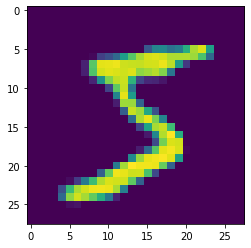

In [27]:
for image in prediction_train:
    plt.imshow(tf.squeeze(image))
    break

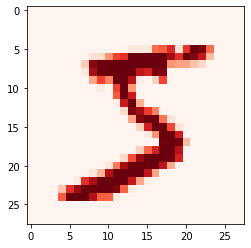

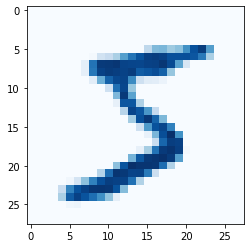

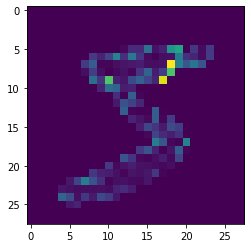

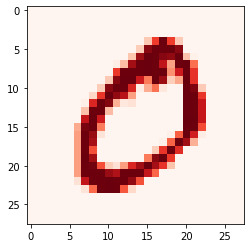

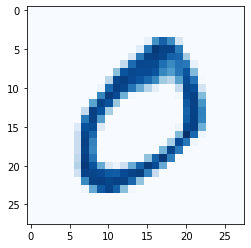

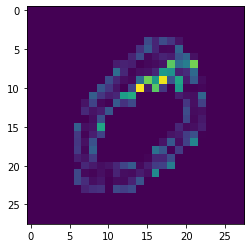

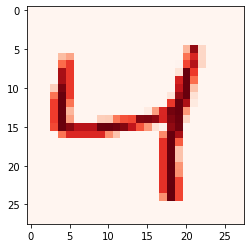

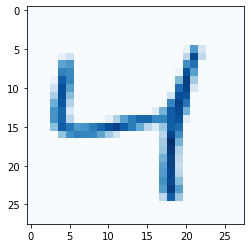

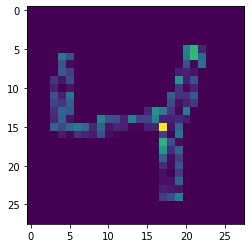

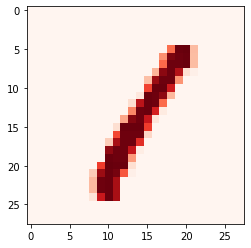

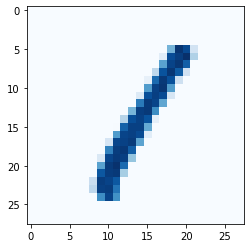

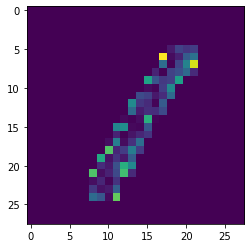

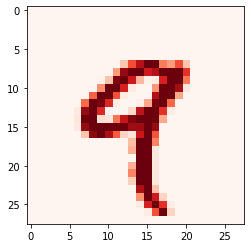

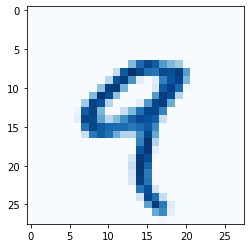

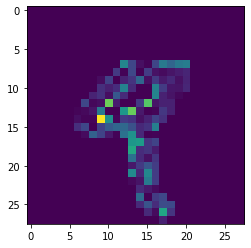

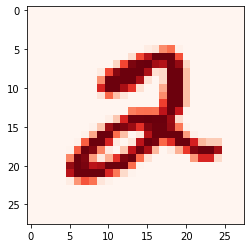

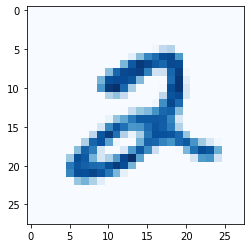

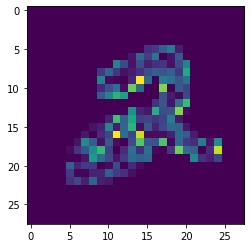

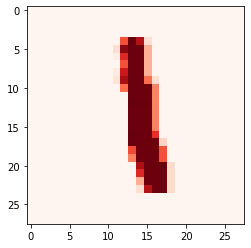

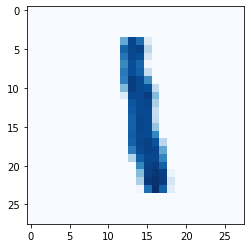

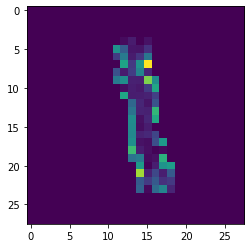

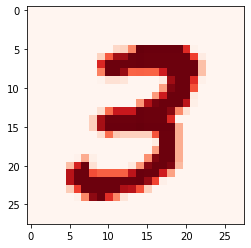

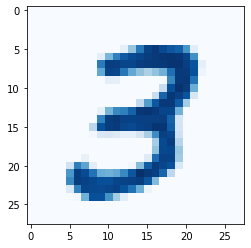

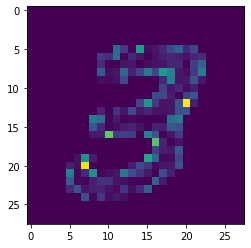

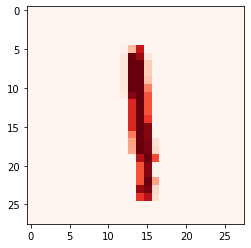

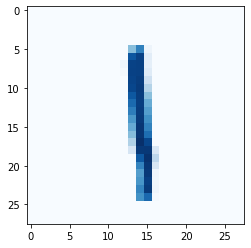

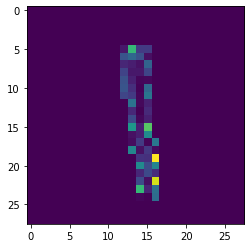

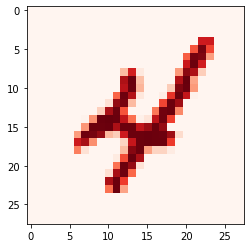

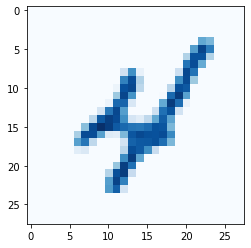

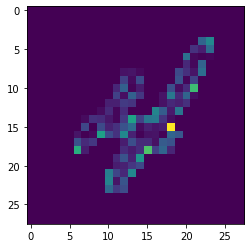

In [32]:
for original, pred in zip(tf.squeeze(data_train[:10]), prediction_train):
    plt.imshow(tf.squeeze(original), cmap = "Reds")
    plt.show()     
    plt.imshow(tf.squeeze(pred), cmap = "Blues")
    plt.show() 
    
    plt.imshow(tf.abs(tf.squeeze(original) - tf.squeeze(pred)))
    plt.show()

In [30]:
tf.abs(tf.squeeze(original) - tf.squeeze(pred))

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.000